# Gradient Boosting

Boosting is a powerful ensemble technique in machine learning. Unlike traditional models that learn from the data independently, boosting combines the predictions of multiple weak learners to create a single, more accurate strong learner.

Gradient Boosting algorithms work iteratively by adding new models sequentially, with each new addition aiming to resolve the errors made by the previous ones. The final prediction of the aggregate represents the sum of the individual predictions of all the models.

Gradient Boosting is one of the models you can use "out-of-the-box"; there are industry applications for this algorithm right away.

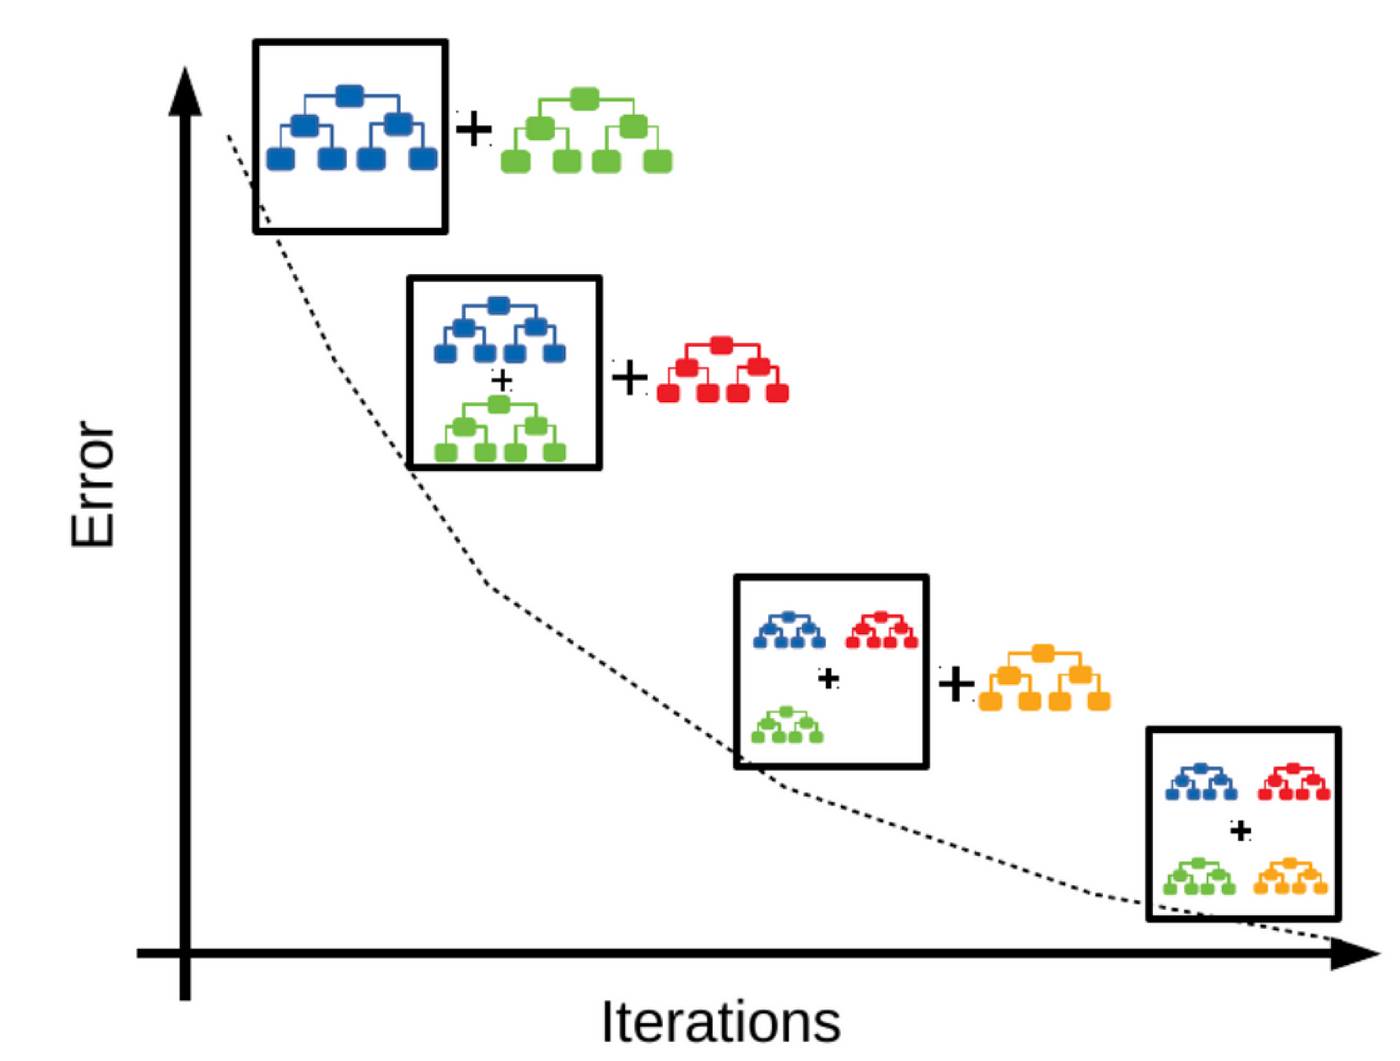

## Loss Functions

A loss function is a critical component that lets us quantify the difference between a model's predictions and the actual values. It measures how well a model is performing.

Here is a breakdown of a loss function's role:

1. *Calculates the error:* Takes the predicted output of the model and compares it to the ground truth (actual observed values). How it compares, i.e., calculates the difference, varies from function to function.

2. *Guides model training:* a model's objective is to minimize the loss function. Throughout training, the model continually updates its internal architecture and configuration to make the loss as little as possible.

3. *Evaluation metric:* By comparing the loss on training, validation, and test datasets, you can assess your model's ability to generalize and avoid overfitting.

The two most common loss functions are:

- **Mean Squared Error (MSE)**: This loss function is most popular for regression. It measures the sum of the squared differences between predicted and actual values.

- **Cross-entropy:** This function measures the difference between two probability distributions. It is commonly used for classification tasks where the target (or targets) have discrete categories.

In this notebook, we're going to use Gradient Boosting to determine whether a fire alarm should or shouldn't go off considering conditions within a home. Since this is a classification task, the loss function at play is cross-entropy.

## Pros and Cons of Gradient Boosting

Pros: High accuracy, flexibility, works well with imbalanced data, feature importance, robust to overfitting (with proper tuning), and versatile for different tasks.

Cons: Slower training, sensitive to hyperparameter tuning, potential for overfitting with large trees, low interpretability, and higher resource consumption.

Gradient Boosting is often a go-to model for high-performance machine learning tasks, but requires careful hyperparameter tuning, efficient training techniques, and adequate computational resources to make the most out of its strengths.

✍🏼 In order to edit this notebook, make a copy and save it in your Google Drive.

## Set-Up, Preprocessing, and EDA

### Set Up

This project is based on [this notebook](https://www.kaggle.com/code/zakariajoudar/gradient-boosting-smoke-detection) by
Zakaria Joudar.

💾 Download the dataset [here](https://www.kaggle.com/code/zakariajoudar/gradient-boosting-smoke-detection?select=smoke_detection_iot.csv).

Let's begin by importing necessary libraries, then importing our dataset, and using `.info()` to get a feel for it.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('smoke_detection_iot.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


### Preprocessing

All of our features are numeric, so we don't have to encode anything, but let's make sure our data is nice and clean before moving on.

**✅ Try it yourself:** Check for missing and duplicate values.

In [ ]:
# Your Code Here

df.isnull().sum()
df.duplicated().sum()

0

**❓ Question: ** Why don't we need to use feature scaling for Gradient Boost?

Answer: Because Gradient Boost is a tree-based algorithm.

### EDA

Before implementing our model, let's use exploratory data analysis techniques to get a better understanding of the features.

First, let's break down the units of our features:

1. Temperature [C] – Measured in degrees Celsius (°C), representing the ambient temperature.
2. TVOC [ppb] – Measured in parts per billion (ppb), indicating the concentration of Total Volatile Organic Compounds in the air.
eCO2 [ppm] – Measured in parts per million (ppm), representing the estimated equivalent CO2 levels, often used as an indicator of air quality.
3. PM2.5 [µg/m³] – Measured in micrograms per cubic meter (µg/m³), representing the concentration of fine particulate matter (particles ≤2.5 microns in diameter).
4. Raw H2 [sensor units] – Typically measured in sensor-specific units, representing the raw signal from a hydrogen gas sensor.

**✅ Try it yourself:** Convert the `Temperature` column to Fahrenheit using the formula:

` Temp in Fahrenheit = 1.8*(Temp in Celsius) + 32`

In [ ]:
# Your Code Here

# Convert Temperature from Celsius to Fahrenheit
df["Temperature[F]"] = (df["Temperature[C]"] * 9/5) + 32

# Display the first few rows to verify the conversion
df[["Temperature[C]", "Temperature[F]"]].head()

df.drop('Temperature[C]', axis = 1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
 15  Temperature[F]  62630 non-null  float64
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


Distributions reveal whether features are skewed, normally distributed, or contain outliers, which can impact model learning. For instance, highly skewed features may require log transformations to improve predictive power, while outliers in features like temperature or gas concentrations might indicate rare events like sensor errors that could distort model training.

**✅ Try it yourself:** Plot the distributions of key features such as `Temperature` and `Raw H2`.

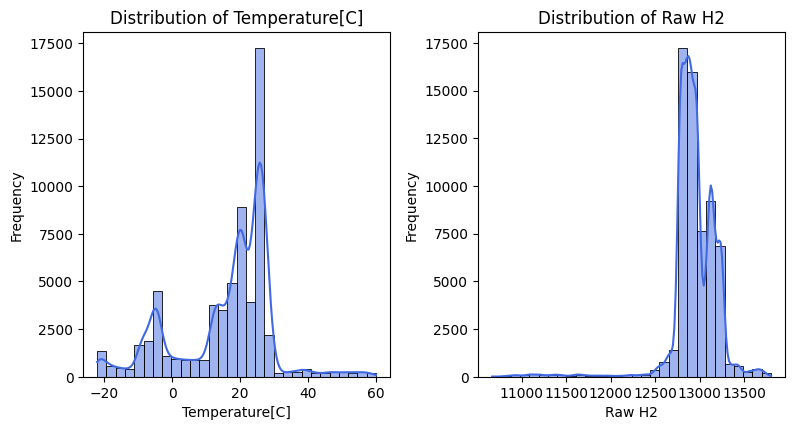

In [ ]:
# Your Code Here

# List of key features to visualize
features = ["Temperature[C]", "Raw H2"]

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through features and plot their distributions
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Arrange in a grid
    sns.histplot(df[feature], kde=True, bins=30, color="royalblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Now, let's determine if our target variable is balanced or unbalanced.

<ipython-input-19-cae67282099c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fire Alarm', data=df, palette='Set2')


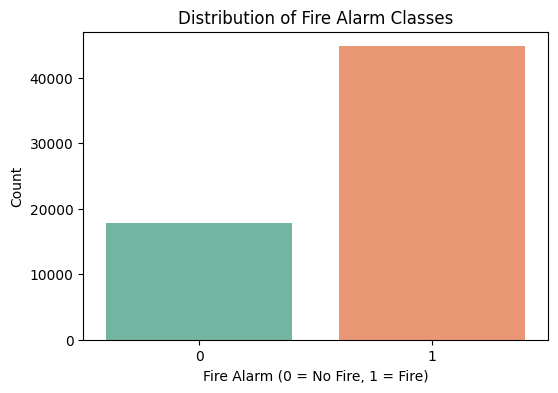

In [ ]:
# Plot the distribution of the 'Fire Alarm' target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Fire Alarm', data=df, palette='Set2')

# Add labels and title
plt.title('Distribution of Fire Alarm Classes')
plt.xlabel('Fire Alarm (0 = No Fire, 1 = Fire)')
plt.ylabel('Count')

# Show the plot
plt.show()

Gradient Boosting is generally considered a good choice for dealing with an unbalanced target variable, as its iterative nature allows it to focus on misclassified examples from the minority class, making it more sensitive to detecting patterns within imbalanced datasets; compared to other algorithms, it can often perform better on such scenarios.

### Feature Engineering

To determine whether there is a fire, we might place a particular emphasis on metrics would be Temperature, TVOC (Total Volatile Organic Compounds), eCO2 (equivalent CO2), Raw H2, Raw Ethanol, and PM2.5 (Particulate Matter 2.5 microns in size). A fire would likely cause a significant rise in temperature due to the heat generated by combustion. Additionally, burning materials release a high concentration of volatile organic compounds (TVOC), carbon dioxide (eCO2), hydrogen (Raw H2), and ethanol (Raw Ethanol) as byproducts of combustion. Smoke from a fire also contains fine particulate matter, particularly PM2.5, which can indicate the presence of smoke and airborne ash. A sharp increase in these values, especially when occurring together, could strongly suggest the presence of a fire.

**✅ Try it yourself:** Create a correlation matrix between all of our features.

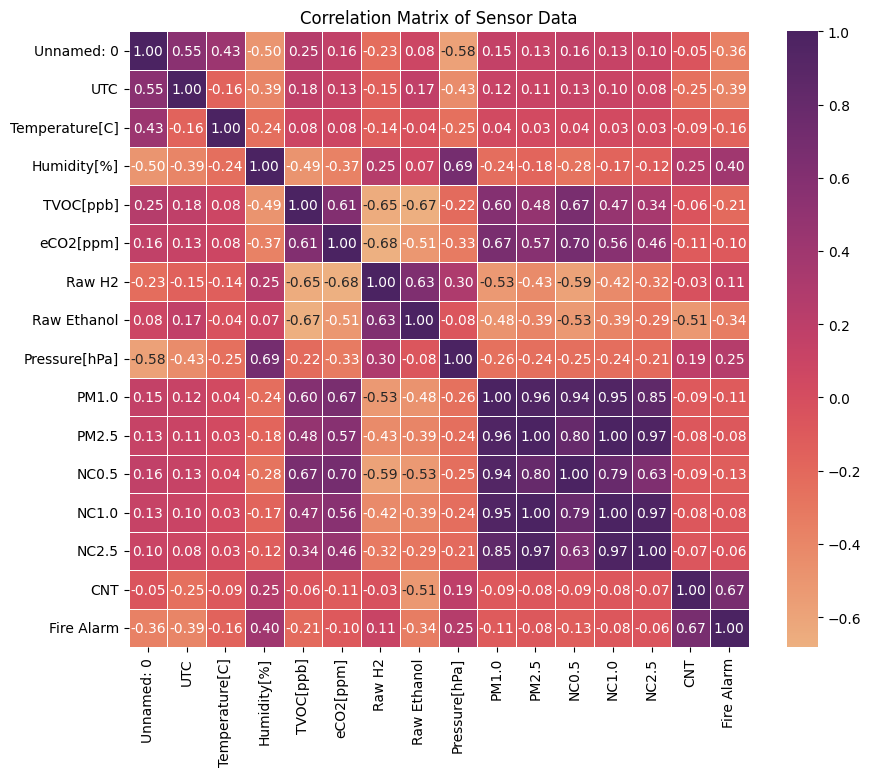

In [ ]:
# Your Code Here

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="flare", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sensor Data")
plt.show()


**❓ Question:** What fact about the correlation matrix tells us that we can safely drop either NC1.0 or PM2.5?

Answer: Correlation coefficient of 1.

In [ ]:
# Dropping redundant features

df = df.drop('PM2.5', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(7), int64(8)
memory usage: 7.2 MB


## Model Implementation

The beauty of Gradient Boosting is that it is usually highly accurate without having to be used in combination with other algorithms. Let's seperate our features and target, seperate our training and test set, then use the Gradient Boosting function from `sklearn`.

Here are some details about the hyperparameters of `GradientBoostingClassifier` from `sklearn`:

- `n_estimators`: This sets the number of decision trees (weak learners) that will be used in the boosting process. A higher value typically leads to better performance, but also increases the risk of overfitting and training time.

- `learning_rate`: This controls the step size at each iteration while updating the model. A smaller learning rate helps prevent overfitting by making the learning process more gradual. A lower value (e.g., 0.01) requires more trees (higher n_estimators) to achieve similar performance but generally leads to a better model.

- `max_depth`: This limits the depth of each individual decision tree. A depth of 3 means that each tree will have at most 3 levels, preventing overfitting by ensuring that trees don't become too complex. A lower value keeps the model simple, avoiding overfitting to the training data.

- `random_state`: This ensures reproducibility of the model's results. By setting a fixed seed (in this case, 42), the random processes in the model (such as the data splits and the selection of features) will yield the same results each time the code is run.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split Features and Target
X = df.drop(columns=["Fire Alarm"])  # Features
y = df["Fire Alarm"]  # Target variable

# Split Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate GradiantBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the Model to the Data
gbc.fit(X_train, y_train)

# Make Predictions
y_pred = gbc.predict(X_test)

# Basic Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Model Accuracy: 0.99

Confusion Matrix:
 [[3546   29]
 [ 107 8844]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3575
           1       1.00      0.99      0.99      8951

    accuracy                           0.99     12526
   macro avg       0.98      0.99      0.99     12526
weighted avg       0.99      0.99      0.99     12526



## Model Evaluation

Recall that K-fold cross-validation is a technique used to assess the generalization ability of a machine learning model by splitting the data into K subsets (or "folds"). The model is trained on K-1 folds and tested on the remaining fold. This process is repeated K times, with each fold serving as the test set exactly once. The results are averaged to provide a more reliable estimate of the model’s performance.

In the case of Gradient Boosting, especially with a relatively low number of n_estimators=10, k-fold cross-validation helps ensure that the model’s performance isn't just due to overfitting or chance, but rather reflects its ability to generalize across different data splits. By performing cross-validation, we can identify if the model consistently performs well or if performance fluctuates depending on the data used for training. This is especially helpful in cases like ours where we already observe high accuracy, as it confirms that the model's performance is not due to overfitting on a specific dataset but is robust across different subsets of data.

Cross-validation scores for each fold: [1.         0.75850232 0.99337378 0.98994092 0.91018681]
Mean accuracy across all folds: 0.93
Standard deviation of accuracies: 0.09


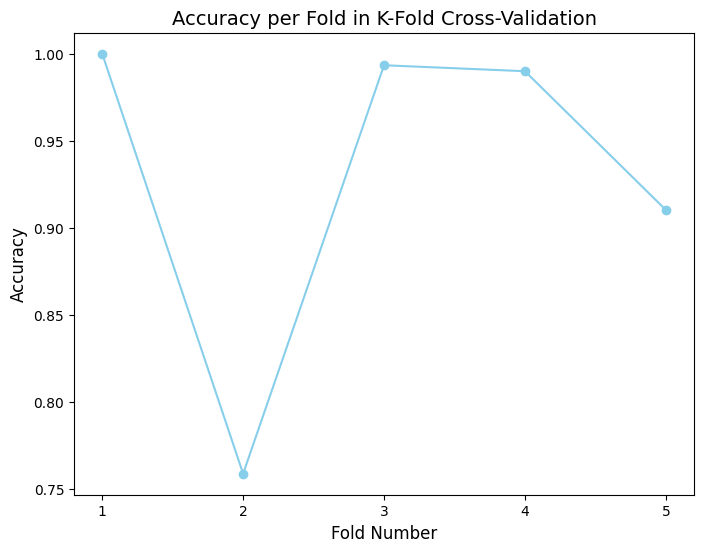

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform K-fold cross-validation with 5 folds
cv_scores = cross_val_score(gbc, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Mean accuracy across all folds: {np.mean(cv_scores):.2f}")
print(f"Standard deviation of accuracies: {np.std(cv_scores):.2f}")

# Plot fold number vs accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='skyblue')

# Add title and labels
plt.title('Accuracy per Fold in K-Fold Cross-Validation', fontsize=14)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(range(1, len(cv_scores) + 1))  # Ensure x-ticks correspond to each fold number

# Show the plot
plt.show()

The cross-validation scores represent the accuracy of the model on each fold of the cross-validation process. The first fold shows a perfect accuracy, indicating that the model performed flawlessly on that subset of data. However, the second fold has a notably lower accuracy, which suggests that the model had more difficulty predicting this particular subset. The subsequent folds demonstrate strong performance, with accuracy scores close to 1.0, indicating that the model generally performs well on the majority of the data. The final fold shows a slight drop in performance but still reflects strong predictive power. Overall, the variability in the scores suggests that the model may have encountered some challenges with specific data subsets, but it consistently achieves high accuracy across most folds. This indicates a robust model, though there is some potential for improvement in the second fold where accuracy is lower.

Given the variability in the cross-validation scores, particularly the lower score in the second fold, here are some next steps you can take to improve and better understand your model's performance:

- Analyze the Data Subsets (Folds): Examine the data in each fold, especially the one with the lowest accuracy. This can help you identify any specific characteristics in that fold, such as potential data imbalances, outliers, or

- Tune Hyperparameters: Experiment with different values for the hyperparameters of the Gradient Boosting model, such as n_estimators, learning_rate, max_depth, etc. Hyperparameter tuning can help the model generalize better and perform more consistently across different folds.


- Feature Engineering: Investigate your features to see if there are any transformations or new features you can create to improve the model's ability to distinguish between different classes. This could involve scaling, normalization, or creating interaction features. Evaluate feature importance to understand which features are contributing most to the model’s predictions. Removing irrelevant or redundant features can help the model perform more consistently.

- Check for Overfitting: Our cross-validation scores could indicate overfitting. To address this, consider adjusting the model’s complexity (e.g., reducing max_depth) or increasing regularization.

**✅ Try it yourself:** Pick at least one of these steps and implement it with the goal of making our accuracy more consistent across folds.

In [ ]:
# Your Code Here

**🤺 Challenge:** Plot accuracy against the number of estimators. Do you see a jump in the accuracy at a given estimator number? Is there a point where the model begins to overfit?

In [ ]:
# Your Code Here

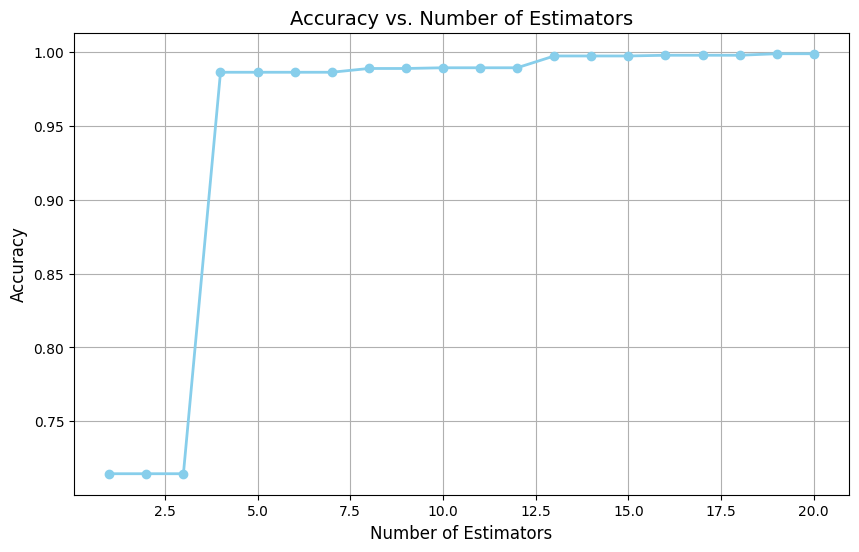

In [ ]:
# Initialize Gradient Boosting Classifier with n_estimators=20
gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gbc.fit(X_train, y_train)

# Initialize a list to store accuracy values for each stage
accuracies = []

# Compute accuracy at each stage
for y_pred in gbc.staged_predict(X_test):
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the accuracy vs number of estimators
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.title('Accuracy vs. Number of Estimators', fontsize=14)
plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True)
plt.show()

## Conclusion

💡 **Main idea**: Gradient Boosting is an ensemble learning technique that builds a series of decision trees sequentially, where each tree corrects the errors made by the previous one. It combines the predictions of these trees to produce a final strong model, minimizing the loss function through gradient descent.

### 📑 Sources and Further Reading:
1. [Smoke Detection with Gradient Boost](https://www.kaggle.com/code/zakariajoudar/gradient-boosting-smoke-detection) | Zakaria Joudar
2. [A Guide to the Gradient Boosting Algorithm](https://www.datacamp.com/tutorial/guide-to-the-gradient-boosting-algorithm)
3. [Gradient Boosting: Data Science's Silver Bullet](https://www.youtube.com/watch?v=en2bmeB4QUo)
